In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/"

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

# Устранение пропусков:

In [ ]:
dataset1 = pd.read_csv(path+'/MyDrive/data.csv')

In [ ]:
dataset1.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
dataset1.shape

(18207, 89)

In [ ]:
data_features1 = list(zip(
# признаки
[i for i in dataset1.columns],
zip(
    # типы колонок
    [str(i) for i in dataset1.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in dataset1.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features1

[('Unnamed: 0', ('int64', 0)),
 ('ID', ('int64', 0)),
 ('Name', ('object', 0)),
 ('Age', ('int64', 0)),
 ('Photo', ('object', 0)),
 ('Nationality', ('object', 0)),
 ('Flag', ('object', 0)),
 ('Overall', ('int64', 0)),
 ('Potential', ('int64', 0)),
 ('Club', ('object', 241)),
 ('Club Logo', ('object', 0)),
 ('Value', ('object', 0)),
 ('Wage', ('object', 0)),
 ('Special', ('int64', 0)),
 ('Preferred Foot', ('object', 48)),
 ('International Reputation', ('float64', 48)),
 ('Weak Foot', ('float64', 48)),
 ('Skill Moves', ('float64', 48)),
 ('Work Rate', ('object', 48)),
 ('Body Type', ('object', 48)),
 ('Real Face', ('object', 48)),
 ('Position', ('object', 60)),
 ('Jersey Number', ('float64', 60)),
 ('Joined', ('object', 1553)),
 ('Loaned From', ('object', 16943)),
 ('Contract Valid Until', ('object', 289)),
 ('Height', ('object', 48)),
 ('Weight', ('object', 48)),
 ('LS', ('object', 2085)),
 ('ST', ('object', 2085)),
 ('RS', ('object', 2085)),
 ('LW', ('object', 2085)),
 ('LF', ('object'

In [ ]:
# Колонки с пропусками
columns_with_na = [c for c in dataset1.columns if dataset1[c].isnull().sum() > 0]
data1_cat_new = dataset1[columns_with_na].copy()

In [ ]:
# % пропусков
[(c, dataset1[c].isnull().mean()) for c in columns_with_na]

[('Club', 0.01323666721590597),
 ('Preferred Foot', 0.0026363486571099027),
 ('International Reputation', 0.0026363486571099027),
 ('Weak Foot', 0.0026363486571099027),
 ('Skill Moves', 0.0026363486571099027),
 ('Work Rate', 0.0026363486571099027),
 ('Body Type', 0.0026363486571099027),
 ('Real Face', 0.0026363486571099027),
 ('Position', 0.0032954358213873785),
 ('Jersey Number', 0.0032954358213873785),
 ('Joined', 0.08529686384357664),
 ('Loaned From', 0.9305761520294392),
 ('Contract Valid Until', 0.015873015873015872),
 ('Height', 0.0026363486571099027),
 ('Weight', 0.0026363486571099027),
 ('LS', 0.1145163947932114),
 ('ST', 0.1145163947932114),
 ('RS', 0.1145163947932114),
 ('LW', 0.1145163947932114),
 ('LF', 0.1145163947932114),
 ('CF', 0.1145163947932114),
 ('RF', 0.1145163947932114),
 ('RW', 0.1145163947932114),
 ('LAM', 0.1145163947932114),
 ('CAM', 0.1145163947932114),
 ('RAM', 0.1145163947932114),
 ('LM', 0.1145163947932114),
 ('LCM', 0.1145163947932114),
 ('CM', 0.11451639

In [ ]:
filtered_columns1 = ['Name','Age','Crossing']
data1 = dataset1[filtered_columns1]
data1.head()

,Name,Age,Crossing
0,L. Messi,31,84.0
1,Cristiano Ronaldo,33,84.0
2,Neymar Jr,26,79.0
3,De Gea,27,17.0
4,K. De Bruyne,27,93.0


In [ ]:
data1['Crossing'] = data1['Crossing'].fillna(data1['Crossing'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1

,Name,Age,Crossing
0,L. Messi,31,84.0
1,Cristiano Ronaldo,33,84.0
2,Neymar Jr,26,79.0
3,De Gea,27,17.0
4,K. De Bruyne,27,93.0
...,...,...,...
18202,J. Lundstram,19,34.0
18203,N. Christoffersson,19,23.0
18204,B. Worman,16,25.0
18205,D. Walker-Rice,17,44.0


In [ ]:
data1_features1 = list(zip(
# признаки
[i for i in data1.columns],
zip(
    # типы колонок
    [str(i) for i in data1.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data1.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data1_features1

[('Name', ('object', 0)), ('Age', ('int64', 0)), ('Crossing', ('float64', 0))]

# Кодирование категориального признака:

In [ ]:
dataset1_features2 = list(zip(
# признаки
[i for i in dataset1.columns],
zip(
    # типы колонок
    [str(i) for i in dataset1.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in dataset1.isnull().sum()],
    [i for i in dataset1.nunique()]
)))
# Признаки с типом данных и количеством пропусков
dataset1_features2

[('Unnamed: 0', ('int64', 0, 18207)),
 ('ID', ('int64', 0, 18207)),
 ('Name', ('object', 0, 17194)),
 ('Age', ('int64', 0, 29)),
 ('Photo', ('object', 0, 18207)),
 ('Nationality', ('object', 0, 164)),
 ('Flag', ('object', 0, 164)),
 ('Overall', ('int64', 0, 48)),
 ('Potential', ('int64', 0, 47)),
 ('Club', ('object', 241, 651)),
 ('Club Logo', ('object', 0, 679)),
 ('Value', ('object', 0, 217)),
 ('Wage', ('object', 0, 144)),
 ('Special', ('int64', 0, 1422)),
 ('Preferred Foot', ('object', 48, 2)),
 ('International Reputation', ('float64', 48, 5)),
 ('Weak Foot', ('float64', 48, 5)),
 ('Skill Moves', ('float64', 48, 5)),
 ('Work Rate', ('object', 48, 9)),
 ('Body Type', ('object', 48, 10)),
 ('Real Face', ('object', 48, 2)),
 ('Position', ('object', 60, 27)),
 ('Jersey Number', ('float64', 60, 99)),
 ('Joined', ('object', 1553, 1736)),
 ('Loaned From', ('object', 16943, 341)),
 ('Contract Valid Until', ('object', 289, 36)),
 ('Height', ('object', 48, 21)),
 ('Weight', ('object', 48, 57

In [ ]:
filtered_columns2 = ['Name','Age','Preferred Foot']
data2 = dataset1[filtered_columns2]
data2['Preferred Foot'].unique()

array(['Left', 'Right', nan], dtype=object)

In [ ]:
 data2['Preferred Foot'] = data2['Preferred Foot'].map(lambda x: 0 if x=='Left' else (1 if x=='Right' else x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data2['Preferred Foot'].unique()

array([ 0.,  1., nan])

# Нормализация числового признака:

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
dataset1['Age']

0        31
1        33
2        26
3        27
4        27
         ..
18202    19
18203    19
18204    16
18205    17
18206    16
Name: Age, Length: 18207, dtype: int64

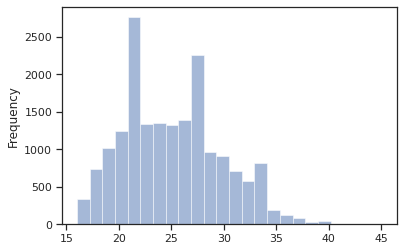

In [ ]:
ax = dataset1['Age'].plot.hist(bins=24, alpha=0.5)

In [ ]:
_, p = stats.normaltest(dataset1['Age'])

alpha = 0.05

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected", p)
else:
    print("The null hypothesis cannot be rejected", p)

The null hypothesis can be rejected 3.430921549749606e-155


# Видим бимодальное распределение.

In [ ]:
Age1 = dataset1.sort_values('Age')['Age'].copy()

Age1 = Age1.rolling(window=30).mean()

Age1 = Age1.dropna()

In [ ]:
_, p = stats.normaltest(Age1)

alpha = 0.05

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected", p)
else:
    print("The null hypothesis cannot be rejected", p)

The null hypothesis can be rejected 3.109091816909981e-178


In [ ]:
Age1

16254    16.000000
11457    16.000000
17841    16.000000
16544    16.000000
17808    16.000000
           ...    
12192    39.766667
10545    39.866667
18183    40.033333
17726    40.200000
4741     40.400000
Name: Age, Length: 18178, dtype: float64

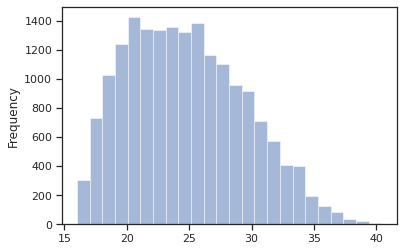

In [ ]:
ax = Age1.plot.hist(bins=24, alpha=0.5)

# По статистическому тесту мы не приблизили нашу колонку к нормальному распределению, но визуально теперь распределение больше похоже на нормальное. Учитывая бимодальную природу исходных данных колонки 'Age' у нас не получилось приблизить это распределение к нормальному. 